<center><font size="16">Human Resource Analysis</font></center>

Companies want to improve and maintain a healthy relationship and environment for their employees. This can be achieved by recognizing and understanding the important factors that are associated with employee turnover and taking care of them might add into the productivity and growth of the employees. These insights can help managers for grabing the opportunity to take corrective steps to build and preserve their successful business. 
<br><br>
In this notebook, we will work on the project that is based on understanding what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not.<br><br>

### Column Description

- satisfacion_level: Showing satisfaction of a particular employee
- last_evaluation: Showing last evaluation of a particular employee
- number_project: Showing number of projects handled a particular employee
- average_montly_hours: Showing the monthly hours that were spent the particular emloyee
- time_spend_company: Shows the number of years spent by the particular employee in the company.
- Work_accident: Showing an employee has whether been part of the company or not.
- left: Tells either and employee has left the company or not. Shows two values 0= not left, 1= left
- promotion_last_5years: Shows that the whether the employee has got any promotion in the last 5 years or not.
- dept: Shows the departments
- salary: Shows the salary type of the employee

# Wrangling & EDA

## 1. Loading Packages

In [1]:
#Write code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## 2. Loading Data & Basic Analysis

- **Task 1**:Load the data and after making a copy of it, find **shape, data types, basic statistics, and null values** from the data set

In [2]:
# Load the data
data= pd.read_csv('HR_comma_sep.csv')
df = data.copy()

In [3]:
# Find the shape
print('Rows:   ', df.shape[0])
print('Columns:', df.shape[1])

Rows:    14999
Columns: 10


In [4]:
# Display the top 5 rows.
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Find the data types of columns
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [6]:
# Find the basic statistics
df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [7]:
# Find the null values
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [8]:
left = df.groupby('left')
left.mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


# 3. Exploration

Before moving ahead, let us check the details of different variables in the data

**Task 2: Plot/Find out the how many employees left the company?**

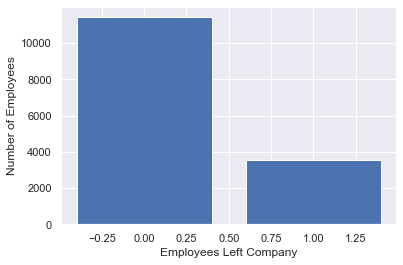

In [9]:
# Count of how many employees left the company
left_count=df.groupby('left').count()
plt.bar(left_count.index.values, left_count['satisfaction_level'])
plt.xlabel('Employees Left Company')
plt.ylabel('Number of Employees')
plt.show()

In [10]:
df.left.value_counts()

0    11428
1     3571
Name: left, dtype: int64

**Question:What can you interpret from the plot above?** 

Answer: Here, we can see out of 15,000 approx 3,571 were left, and 11,428 stayed. The no of employee left is 23 % of the total employment.

**Task 3: Plot/Find out the number of projects being handled.**

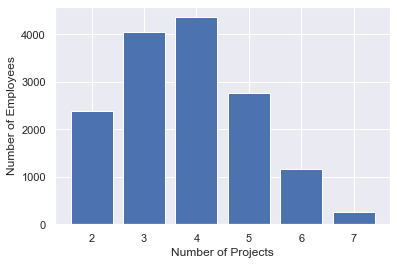

In [11]:
# Write code here
num_projects=df.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

In [12]:
df.number_project.value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

**Question: What insights can you infer from the above plot?**

Answer: Most of the employee is doing the project from 3-5.

**Task 4: Find out how number of projects contributed to employee turn-over.**
<br>
<br>

*Now we want to see how number of projects contribute to employee turn-over.<br> For this purpose, we can do a groupby. The final results will show the of employees leaving the company against each number of projects .*

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

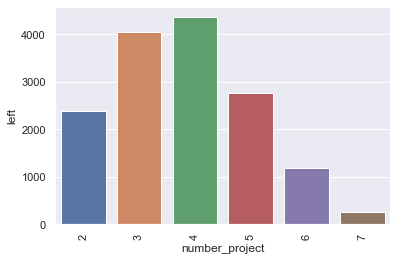

In [14]:
df_group = df.groupby(by=['number_project'],as_index=False).count()
ax = sns.barplot(x="number_project", y="left", data=df_group)
plt.xticks(rotation = 90)

**Task 5:** Make a plot of your findings (only turn-over employees)

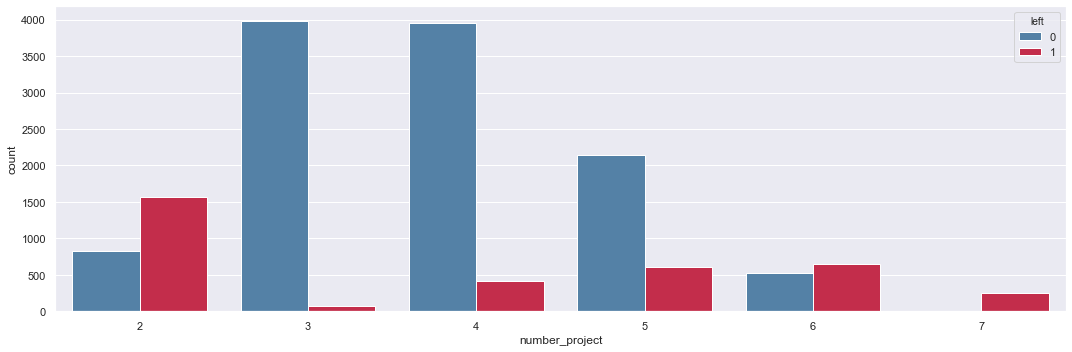

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(df['number_project'],
              hue = df['left'],
              palette = ('steelblue', 'crimson'))
plt.tight_layout()

**Question: What can you conclude from the above graph? Which people are leaving the company(as per number of projects)? What can be the reasons behind?**

Answer: The main observation regarding the number of projects is that employees with only 2 or more than 5 projects have a higher probability to leave the company.

## **Time spent at the company**

**Task 6: Find out how time spend at company can lead to employee turn over. Show the following plots.**<br>
- Count of Number of years spent by employees.
- After how many years are mostly employees leaving the company? 

*Hint: For the second part do the similar procedure as done in case of 'number_projects' above. Try to find the **percetage** to show that after how much time/years did most of employees exactly leave.*

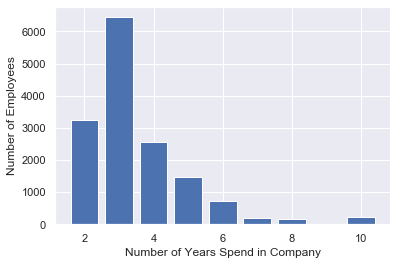

In [16]:
# Show the plot for the count of years here
time_spent=df.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

**Question: What is the maximum number of time spend by the employees?**

Answer: Most of the employee experience between 2-4 years. Also, there is a massive gap between 3 years and 4 years experienced employee.

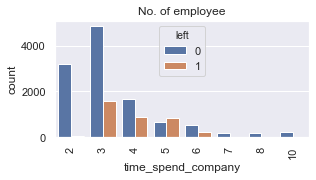

In [17]:
# Write the code here to get the percentage of employees leaving.
# Write the code here to draw a bar plot showing years after which employees are likely to leave
features=['time_spend_company']
fig=plt.subplots(figsize=(10,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

**Question: After what time period are employees most likely to leave the company ?**

Answer: Here, The three-year mark looks like a time to be a crucial point in an employee's career. Most of them quit their job around the three-year mark. Another important point is 6-years point, where the employee is very unlikely to leave.

## **Employees engaged in any work accident**

**Task 7: Find out that how many employees were engaged in work accident and how many of them actually left? Use count plots to show your results**

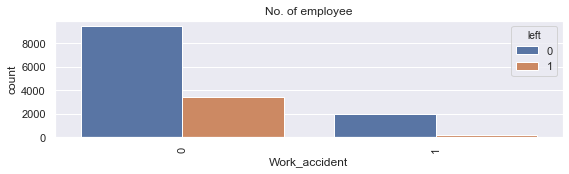

In [18]:
# Number of employees involved in work accident
features=['Work_accident']
fig=plt.subplots(figsize=(20,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

## **Promotions in last 5 years**

**Task 8: Plot How many number of employees got the promotion in last 5 year and how many of them left?**

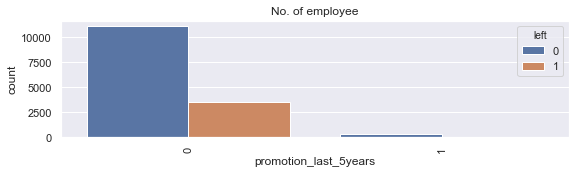

In [19]:
# Write code here
features=['promotion_last_5years']
fig=plt.subplots(figsize=(20,15))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df, hue='left')
    plt.xticks(rotation=90)
    plt.title("No. of employee")

Answer: The employee with five-year experience is leaving more because of no promotions in last 5 years and more than 6 years experience are not leaving because of affection with the company.

## **Salary trends**

**Task 9: What are the salary trends in the data? Use graphical representation for explanation**

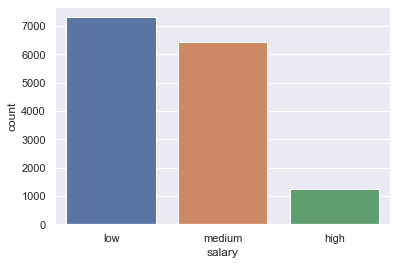

In [20]:
#Write code here
sns.countplot(x='salary', data=df)

Answer: The maximum employees are getting salary either medium or low.

**Quesion: Which type salary holders are most likely to leave? Try to show the percentage of employees who left according to their salaries, using a bar plot or as you like.**

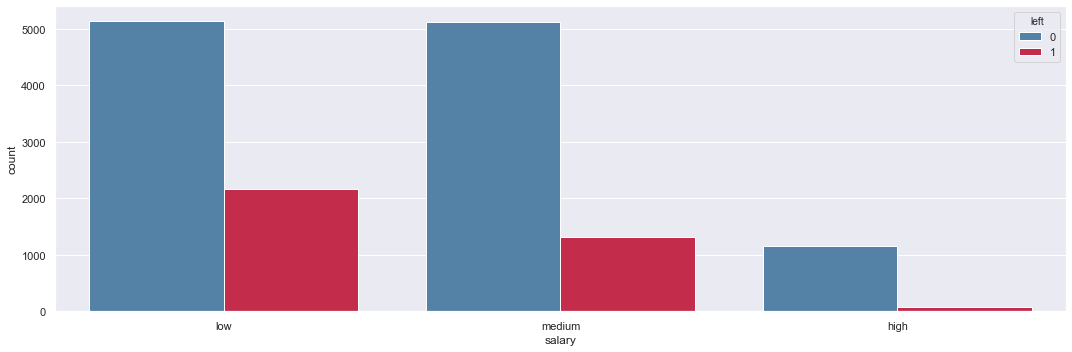

In [22]:
# Write code here
plt.figure(figsize=(15,5))
sns.countplot(df['salary'],
              hue = df['left'],
              palette = ('steelblue', 'crimson'))
plt.tight_layout()

**Question: What does the above plot show?**

Answer: Most of the employees that quit among the mid or low salary groups.

## **Employees per Department**

**Task 10: Plot/Find out employees per department and also see which which department has highest number of employees leaving the company.**

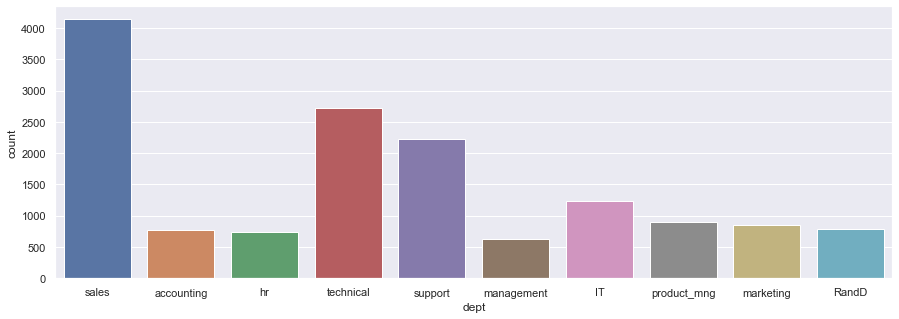

In [23]:
# Write the code here to check employee count in each department. You can use a graphical representation or use simple code to check.
plt.figure(figsize=(15,5))
sns.countplot(x='dept', data=df)

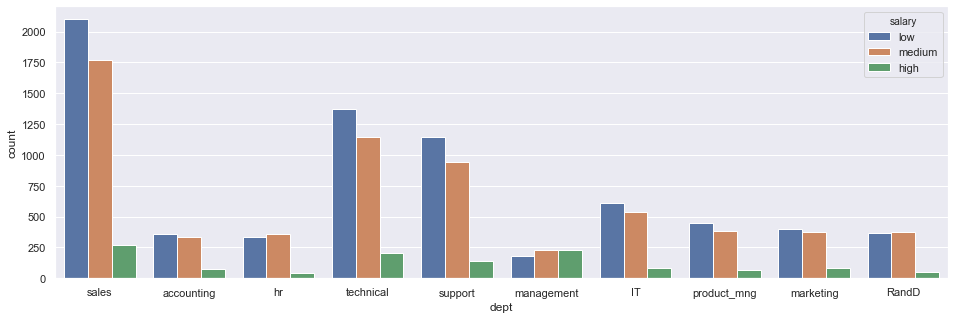

In [24]:
plt.figure(figsize = (16,5))
sns.countplot( df['dept'],hue = df['salary'])

**Question: Which department has maximum number of employees?**

Answer: Sales department

**Question: Which department has highest percentage of turn-over? Use graphical representation to find out.**

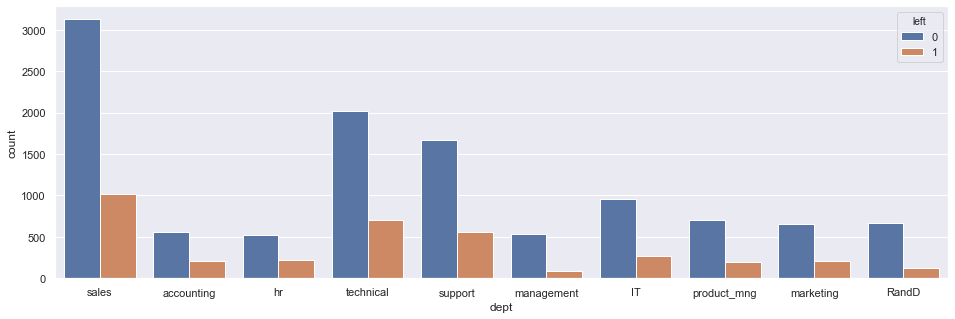

In [25]:
# Write code here
plt.figure(figsize = (16,5))
sns.countplot( df['dept'],hue = df['left'])

Answer: Sales Department

## **Satisfaction Level**

**Task 11: Show the satisfaction level of employees who left the company and those who didn't leave, using a kde plot**

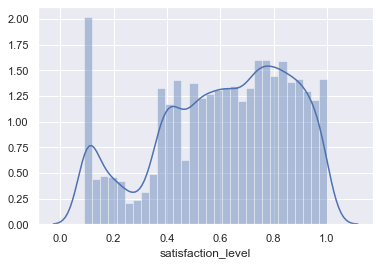

In [26]:
# Write the code here
ax = sns.distplot(data['satisfaction_level'])

**Question: What can you conclude from the plot above?**

Answer: Satisfaction is definitely not normally distributed.

# Feature Engineering

For feature engineering we will two new features. Looking at the the satisfcation we can conclude that people who are leaving have a low satisfaction level, most likely below 0.5 are leaving and people having a high satisfaction_level, most likely above 0.5 are likely to stay. 

**Task 12: Make a new feature 'satisfaction_level_type' through following conditions:**<br>
- **satisfaction_level >= 0.5 then satisfaction_level_type = 'High'**
- **satisfaction_level < 0.5 then satisfaction_level_type = 'Low'**

**Task 13: Make a count plot for satisfaction_level_type and and see which type has more turn over using hue='left'**

Previously we saw that employees having high number of projects are leaving. We also saw that some employees with extremely less number of projects are also leaving the company. Let us see how number of projects and satisfaction level are related.<br>
We can see this by checking the satisfaction level type and number of projects in according to that specific type. 

In [29]:
# Write Code Here
from sklearn.cluster import KMeans
# Filter data
left_emp =  data[['satisfaction_level', 'last_evaluation']][df.left == 1]
# Create groups using K-means clustering.
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(left_emp)

**Make a Plot of your findings**

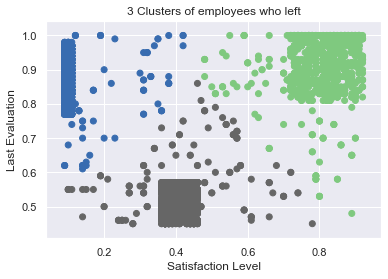

In [30]:
left_emp['label'] = kmeans.labels_
# Draw scatter plot
plt.scatter(left_emp['satisfaction_level'], left_emp['last_evaluation'], c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction Level')
plt.ylabel('Last Evaluation')
plt.title('3 Clusters of employees who left')
plt.show()

**Question:** What did you infer drom the above plot

**Answer:** Here, Employee who left the company can be grouped into 3 type of employees:

- High Satisfaction and High Evaluation(Shaded by green color in the graph), you can also call them Winners.
- Low Satisfaction and High Evaluation(Shaded by blue color(Shaded by green color in the graph), you can also call them Frustrated.
- Moderate Satisfaction and moderate Evaluation (Shaded by grey color in the graph), you can also call them 'Bad match'.

Notice that there is are people associated with low satisfaction level, have either too less projects, i.e. number of projects = 2 or high number of projects i.e. 6 or even 7. The over all count for 7 is low but there is a significant raise if we compare its count with higher satisfaction level.

**Task 14: Make a new column 'employee_type' and assign categories as following:**<br>
- **If number of projects is equal to 2 then employee_type='unburdened'**
- **If number of projects is between 3 and 5 then employee_type = 'Satisfactory'**
- **If number of projects is 6 and above then employee_type='Burdened'**

**Task 15: Make a countplot to see which type of employee is leaving**

### Remove Redundant Features

Hint: Look for the columns used in Feature Engineering

In [35]:
# Write code here
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
df['salary']=le.fit_transform(df['salary'])
df['dept']=le.fit_transform(df['dept'])

# Machine Learning

Before moving further, we need to apply one-hot encoding on categorical variables i.e. **dept, salary, satisfaction_level_type,** and **employee_type**

**Task 17: Creating Independant and Dependant Variables**

In [36]:
# Write code here
X=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'dept', 'salary']]
y=df['left']

**Task 18: Perform Train Test Split with test size 30 percent and random state = 100**

In [37]:
from sklearn.model_selection import train_test_split

In [39]:
#Write code here
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.3, random_state=100, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(10499, 9) (10499,)
(4500, 9) (4500,)


**Task 19: Get the predictions using the following models.**<br>
- Random Forest
- Logistic Regression
- Ada Boost
- XG Boost

<br> 

**Also get the following scores for each of the above models**
- Accuracy
- Precision
- Recall
- F1-Score
- Classification Report

## Random Forest

In [45]:
# Importing the model from sklearn
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [46]:
# Making instance and training the model
clf_rf = RandomForestClassifier(random_state=100)

In [47]:
clf_rf.fit(xtrain, ytrain)

C:\Users\dazzl\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [48]:
# Get predictions
rf_pred=clf_rf.predict(xtest)
rf_pred_prb = clf_rf.predict_proba(xtest)[:, 1]

**Precision**

In [50]:
# Write the code to import the function for calculation of the specific score
rf_precision = precision_score(ytest,rf_pred)

In [52]:
#Write the code to calculate
rf_precision

0.991588785046729

**Accuracy**

In [53]:
# Write the code to import the function for calculation of the specific score
rf_acc = accuracy_score(ytest,rf_pred)

In [54]:
# Write the code to calculate
rf_acc

0.9895555555555555

**Recall**

In [55]:
# Write the code to import the function for calculation of the specific score
rf_recall = recall_score(ytest,rf_pred)

In [56]:
# Write the code to calculate
rf_recall

0.9654231119199272

**F1-Score**

In [57]:
# Write the code to import the function for calculation of the specific score
rf_f1_score = f1_score(ytest,rf_pred)

In [58]:
# Write the code to calculate
rf_f1_score

0.9783310281235593

**Classification Report**

In [59]:
# Write the code to import the function for calculation of the specific score
from sklearn.metrics import classification_report

In [60]:
#Write the code to calculate
print(classification_report(ytest,rf_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3401
           1       0.99      0.97      0.98      1099

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



## Logistic Regression

In [61]:
# Import the model
from sklearn.linear_model import LogisticRegression

In [62]:
# Create instance and train, random _state=100
lr_model = LogisticRegression(random_state=100)

In [63]:
lr_model.fit(xtrain, ytrain)

C:\Users\dazzl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
# get the predictions
lr_pred=lr_model.predict(xtest)

In [65]:
lr_pred[0:9]

array([0, 0, 0, 0, 1, 0, 0, 1, 0], dtype=int64)

**Accuracy**

In [68]:
#Write the code here
lr_accuracy=accuracy_score(ytest,lr_pred)
lr_accuracy

0.7648888888888888

**Precision**

In [69]:
#Write the code here
lr_precision=precision_score(ytest,lr_pred)
lr_precision

0.5377532228360957

**Recall**

In [70]:
#Write the code here
lr_recall=recall_score(ytest,lr_pred)
lr_recall

0.2656960873521383

**F1 Score**

In [71]:
#Write the code here
lr_f1_score=f1_score(ytest,lr_pred)
lr_f1_score

0.3556638246041412

**Classification Report**

In [72]:
#Write the code here
print(classification_report(ytest,lr_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3401
           1       0.54      0.27      0.36      1099

    accuracy                           0.76      4500
   macro avg       0.67      0.60      0.61      4500
weighted avg       0.73      0.76      0.73      4500



## Ada Boost

In [73]:
#Write the code here to import the model
from sklearn.ensemble import AdaBoostClassifier

In [75]:
#Write the code here to make an instance and train the model with random state =100
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=100)

In [76]:
# Get the predictions
pred_clf_adb = clf_adb.predict(xtest)

In [77]:
adb_pred_prb = clf_adb.predict_proba(xtest)[:, 1]

**Accuracy**

In [79]:
#Write code here
ab_accuracy= accuracy_score(ytest,pred_clf_adb)
ab_accuracy

0.9611111111111111

**Precision**

In [80]:
#Write code here
ab_precision= precision_score(ytest,pred_clf_adb)
ab_precision

0.9177215189873418

**Recall**

In [81]:
#Write code here
ab_recall= recall_score(ytest,pred_clf_adb)
ab_recall

0.9235668789808917

**F1-Score**

In [82]:
#Write code here
ab_f1_score=f1_score(ytest,pred_clf_adb)
ab_f1_score

0.9206349206349206

**Classification Report**

In [83]:
#Write code here
print(classification_report(ytest,pred_clf_adb))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3401
           1       0.92      0.92      0.92      1099

    accuracy                           0.96      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500



## XG Boost

In [84]:
#Write the code here to import the model
import xgboost as xgb

In [85]:
#Write the code here to make an instance and train the model with random state =100
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1,random_state=100)

In [86]:
clf_xgb.fit(xtrain, ytrain)

C:\Users\dazzl\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:28:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=100, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=25, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [87]:
# Get the predictions
pred_clf_xgb=clf_xgb.predict(xtest)

In [88]:
pred_clf_xgb_prb=clf_xgb.predict_proba(xtest)[:,1]

**Accuracy**

In [90]:
#Write code here
xgb_accuracy= accuracy_score(ytest,pred_clf_xgb)
xgb_accuracy

0.9891111111111112

**Precision**

In [91]:
#Write code here
xgb_precision= precision_score(ytest,pred_clf_xgb)
xgb_precision

0.9852125693160814

**Recall**

In [92]:
#Write code here
xgb_recall= recall_score(ytest,pred_clf_xgb)
xgb_recall

0.9699727024567789

**F1-Score**

In [93]:
#Write code here
xgb_f1_score=f1_score(ytest,pred_clf_xgb)
xgb_f1_score

0.9775332416322787

**Classification Report**

In [94]:
#Write code here
print(classification_report(ytest,pred_clf_xgb))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3401
           1       0.99      0.97      0.98      1099

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.99      4500
weighted avg       0.99      0.99      0.99      4500



# Result Comparisons

**Task 20: Do the comparison of the above used models as per the scores found.Make a datafram that shows the models and scores for each models.**

In [95]:
# Write the code here
comparison_dict={"Algorithm":["Random Forest","Logistic Regression","Ada Boost","XG Boost"],
                 "Accuracy":[rf_acc,lr_accuracy,ab_accuracy,xgb_accuracy],
                 "Precision":[rf_precision,lr_precision,ab_precision,xgb_precision],
                 "Recall":[rf_recall,lr_recall,ab_recall,xgb_recall],
                 "F1 Score":[rf_f1_score,lr_f1_score,ab_f1_score,xgb_f1_score]
                }

In [96]:
comparison = pd.DataFrame(comparison_dict)

In [97]:
comparison

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.989556,0.991589,0.965423,0.978331
1,Logistic Regression,0.764889,0.537753,0.265696,0.355664
2,Ada Boost,0.961111,0.917722,0.923567,0.920635
3,XG Boost,0.989111,0.985213,0.969973,0.977533


**Task 21: Which model has the best score? Do you think that you need to apply any sort of tunning on the model selected. If Yes, then apply it conclude with the final scores of the best model.**

Answer: Random Forest and XG Boost gave almost equal scores. Logistic Regression gave the lower score as compared to other models.